* simple and efficient tool for data mining and data analysis.
* Built i=on numpy, scipy and matplotlib

Uses of scikit learning: 
* classification - identifying which category an object belongs to.
1. Aplication- Spam detection
    
* regression - predicting an atribute associated with an object
1. Aplication- Stock prices predection
    
* clustering - automatical grouping of similar object into sets
1. Aplication- Customer segmentation
    
* model selection- comparing, validating and choosing parameters and model
1. Aplication- Improving model accuracy via parameter turning
    
* dimensionality reduction - recucing the number of random variables to consider.
1. Aplication- To increase model efficiency
    
* Pre-processing - feature extraction and normalization
1. Aplication- Transforming input data such as text for use wth machine learning algorithm

In [3]:
# import required packages:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
wine=pd.read_csv('D:\\PYTHON DEVELOPER with Simplilearn\\WineQT.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
# null values checking
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [9]:
# processing data
bins=(2, 6.5,8)
group_names=['bad','good']
wine['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [10]:
label_quality=LabelEncoder()

In [11]:
wine['quality']=label_quality.fit_transform(wine['quality'])

In [14]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0,10


In [15]:
wine.quality.value_counts()

0    984
1    159
Name: quality, dtype: int64

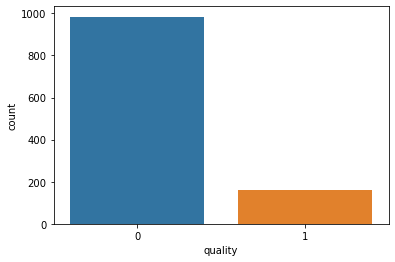

In [17]:
sns.countplot(x='quality', data=wine);

In [18]:
# seperate the dataset as response variable and feature variable

x=wine.drop('quality',axis=1)
y=wine['quality']

In [19]:
# Train and Test spliting of data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
# Applying standard scaling to get optimized result

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Random Forest Classifier

In [22]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
pred_rfc[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [23]:
# lets see how our model performed
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       201
           1       0.77      0.61      0.68        28

    accuracy                           0.93       229
   macro avg       0.86      0.79      0.82       229
weighted avg       0.93      0.93      0.93       229



In [24]:
print(confusion_matrix(y_test,pred_rfc))

[[196   5]
 [ 11  17]]


## SVM Classifier

In [26]:
clf=SVC()
clf.fit(x_train,y_train)
pred_clf=clf.predict(x_test)

In [28]:
# lets see how our model performed
print(classification_report(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       201
           1       0.69      0.32      0.44        28

    accuracy                           0.90       229
   macro avg       0.80      0.65      0.69       229
weighted avg       0.89      0.90      0.88       229



In [27]:
print(confusion_matrix(y_test,pred_clf))

[[197   4]
 [ 19   9]]


## Neural Network

In [29]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(x_train,y_train)
pred_mlpc=mlpc.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
# lets see how our model performed
print(classification_report(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       201
           1       0.56      0.68      0.61        28

    accuracy                           0.90       229
   macro avg       0.76      0.80      0.78       229
weighted avg       0.91      0.90      0.90       229



In [31]:
print(confusion_matrix(y_test,pred_mlpc))

[[186  15]
 [  9  19]]


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
cm=accuracy_score(y_test,pred_rfc)
cm

0.9301310043668122

In [34]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0,10
